In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv('./data/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# 0. Preprocessing

In [21]:
for column in df.columns : 
    ctg = df[column].unique()
    for index, nm in enumerate(ctg) : 
        df.loc[(df[column] == nm), column] = index
        df[column] = df[column].astype(int) # 이거 안해주니깐 그냥 object로 들어가더라 

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [23]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

# 1. EDA

In [5]:
# 컬럼 확인 
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## 1-1. 변수와 target 간의 countplot으로 상관성 확인

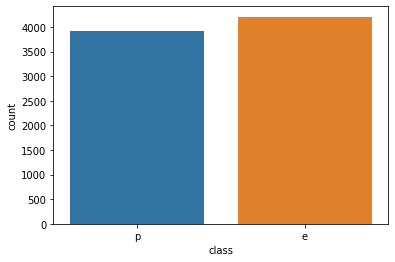

In [7]:
# target 먼저 확인 
sns.countplot(x = 'class', data = df)
plt.show()

식용이 좀 더 많긴 하지만, 그래도 데이터 수의 균형이 어느 정도 맞다. 

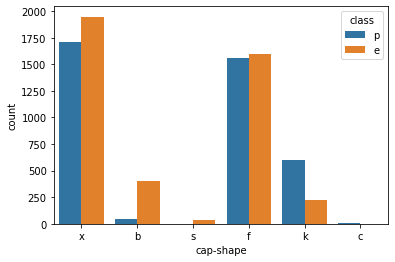

In [11]:
# target과 cap-shape
sns.countplot(x = 'cap-shape', data = df, hue= 'class')
plt.show()


x와 f가 제일 많았지만, b와 k에서 각각 식용과 독성이 유독 많은 것을 확인할 수 있었다.

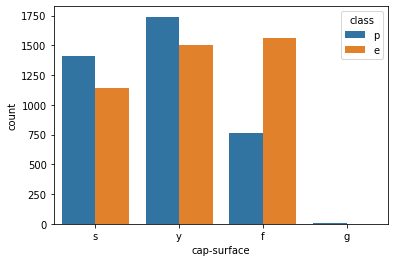

In [12]:
# target과 cap-surface 
sns.countplot(x = 'cap-surface', data = df, hue= 'class')
plt.show()



여기도 f인 경우는 식용이 유독 높음을 확인할 수 있음 

In [27]:
def eda(x, hue, data) : 
    sns.countplot(x=x, hue = hue, data = data) 
    plt.title(x)
    plt.show()

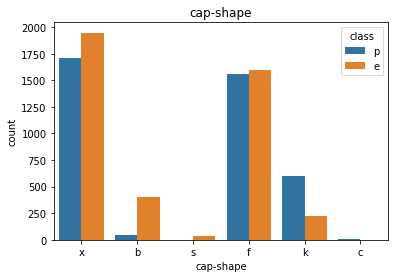

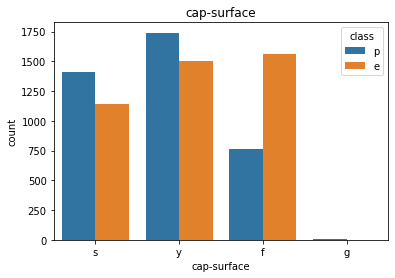

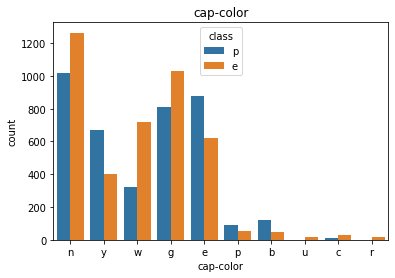

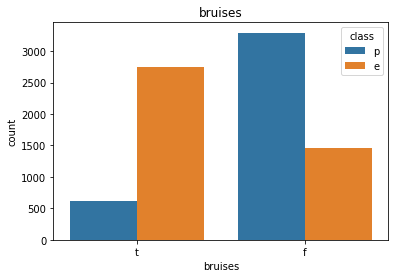

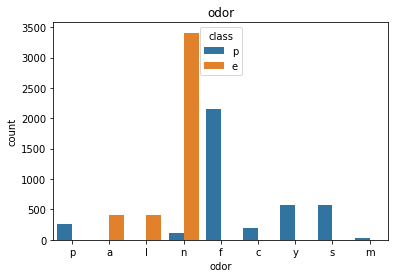

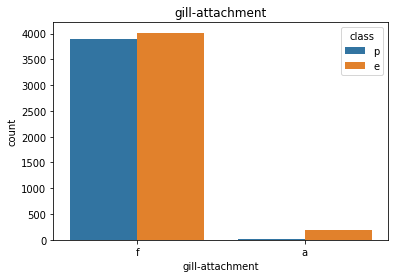

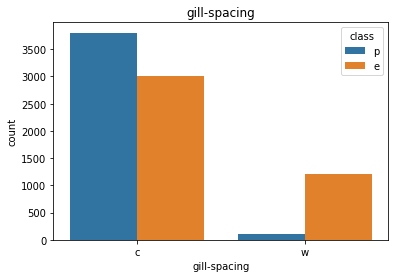

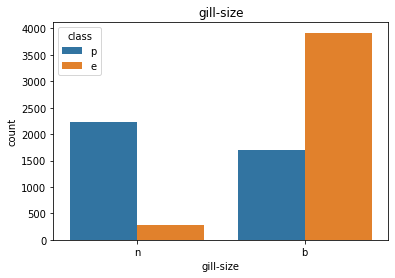

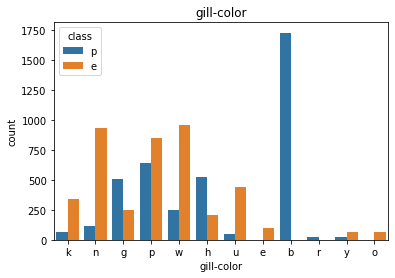

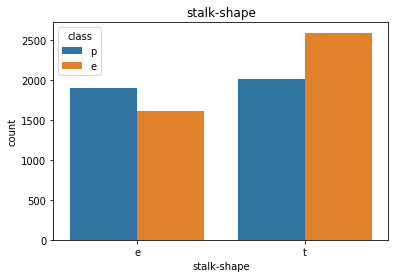

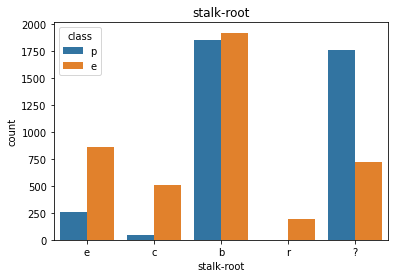

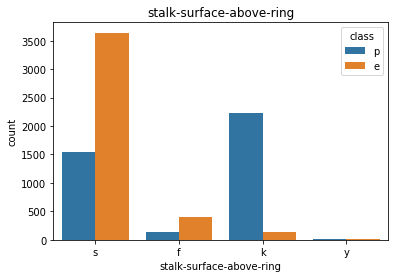

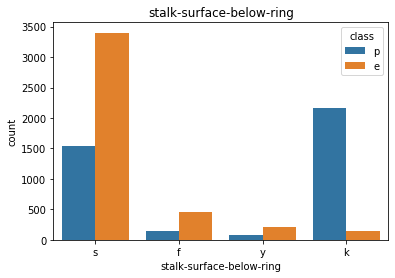

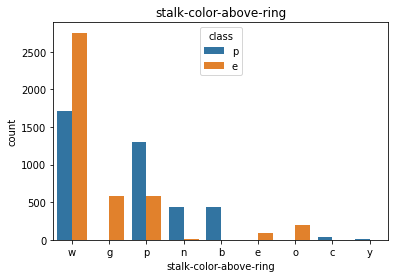

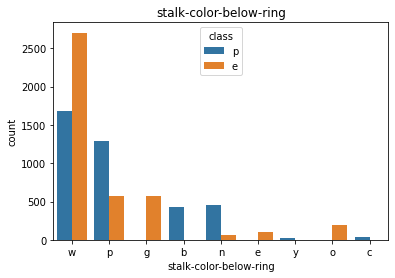

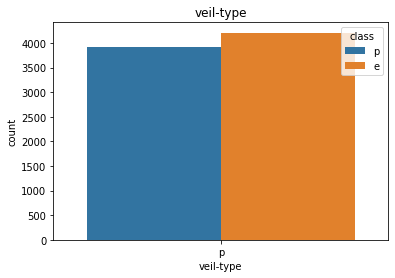

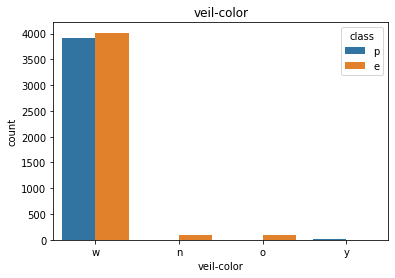

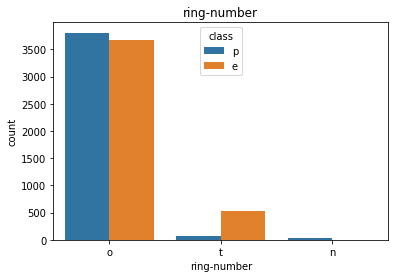

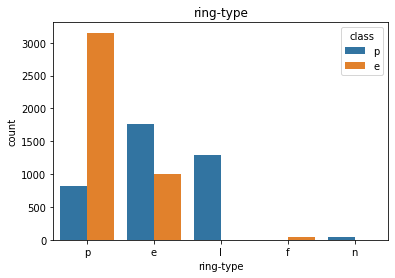

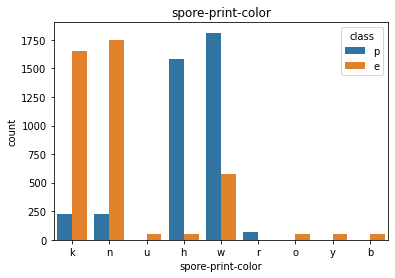

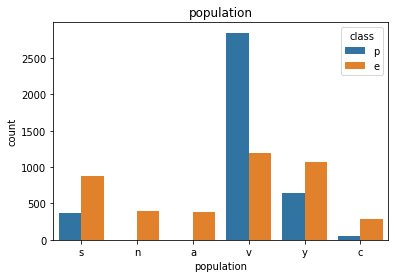

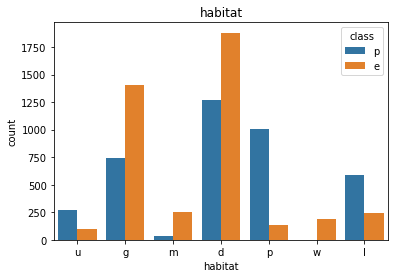

In [28]:
# 모든 컬럼 다 확인해버림.. subplot 으로 보기 좋게하고 싶은데 너무 귀찮다 
for i in df.columns[1:] : 
    eda(i, 'class', df)

- veli-type 같은 경우는 category가 한 개라서 의미가 없는 컬럼임 
- veli-color도 딱히 중요해보이지 않음 

- stalk color도 두 가지 컬럼이 거의 똑같은 분포라서 하나만 사용해도 될 듯 

- spore print color가 뚜렷하군 

- gill attachment도 의미가 별로 안보이는 컬럼 같음 

In [29]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [37]:
# 겹치는 컬럼, 카테고리가 한 개인 컬럼 삭제 
df.drop(['stalk-surface-above-ring', 'stalk-color-above-ring', 'veil-type' ], axis = 1, inplace = True)
df.shape

(8124, 20)

## 1-2. 컬럼끼리의 상관성 correlation plot으로 확인 

사실 category 상관성은 이렇게 확인하는게 아니라고 들었음 

<AxesSubplot:>

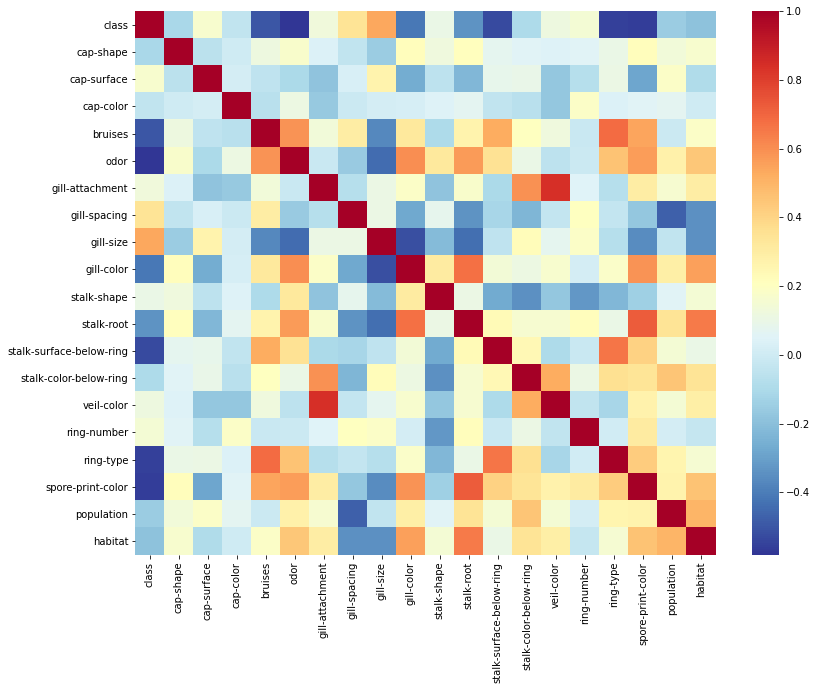

In [38]:
fig, ax = plt.subplots(1,1, figsize = (13,10) )
sns.heatmap(df.corr(), cmap ='RdYlBu_r')

In [39]:
# 상관성 확인
from scipy.stats import chi2_contingency
 
for i in df.columns[:-1] : 
  df_cross = pd.crosstab(index=df[i],columns=df['class'])
  ChiSqResult = chi2_contingency(df_cross)
  print(f'{i} : The P-Value of the ChiSq Test is:', ChiSqResult[1])

class : The P-Value of the ChiSq Test is: 0.0
cap-shape : The P-Value of the ChiSq Test is: 1.1964565685935438e-103
cap-surface : The P-Value of the ChiSq Test is: 5.518427038649143e-68
cap-color : The P-Value of the ChiSq Test is: 6.055814598336574e-78
bruises : The P-Value of the ChiSq Test is: 0.0
odor : The P-Value of the ChiSq Test is: 0.0
gill-attachment : The P-Value of the ChiSq Test is: 5.501707411861009e-31
gill-spacing : The P-Value of the ChiSq Test is: 5.0229776137324786e-216
gill-size : The P-Value of the ChiSq Test is: 0.0
gill-color : The P-Value of the ChiSq Test is: 0.0
stalk-shape : The P-Value of the ChiSq Test is: 4.6047462121551564e-20
stalk-root : The P-Value of the ChiSq Test is: 7.702047904942637e-290
stalk-surface-below-ring : The P-Value of the ChiSq Test is: 0.0
stalk-color-below-ring : The P-Value of the ChiSq Test is: 0.0
veil-color : The P-Value of the ChiSq Test is: 3.320972749169678e-41
ring-number : The P-Value of the ChiSq Test is: 4.235757641722938e-

# 2. 모델링 

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
tree = DecisionTreeClassifier(random_state=700)

x = df.drop('class', axis = 1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=11)

In [10]:
tree.fit(x_train, y_train)

ValueError: ignored